# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part A): Object Recognition [75%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keeping the same structure**: retain the questions, and avoid adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
sns.set()


/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

In [2]:
# load the dataset
a_img = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'Images_A_Train.csv'))

# combine both subsets of the orginial dataset
a_img = pd.concat([a_img.iloc[:,0:501],a_img['is_person']],axis =1)

# displays the new dataset with 10 rows
a_img.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0.000558,0.005301,0.001116,0.004185,0.000837,0.006975,0.001953,0.001674,0.000558,1
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0.000000,0.008203,0.001172,0.007422,0.004297,0.001563,0.000000,0.003125,0.004687,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0.000000,0.000521,0.000521,0.002083,0.000000,0.000000,0.000521,0.003646,0.000000,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0.000000,0.015253,0.000744,0.001488,0.000744,0.000372,0.001860,0.000000,0.001860,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0.000679,0.000000,0.001359,0.001019,0.003736,0.008152,0.003736,0.000679,0.001698,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0.005580,0.000744,0.000000,0.000000,0.000000,0.000000,0.001116,0.000372,0.000372,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0.000000,0.003057,0.001359,0.001698,0.000679,0.006454,0.002378,0.002378,0.001019,1
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0.002232,0.004185,0.000000,0.000000,0.000837,0.000000,0.000279,0.000279,0.003627,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0.000679,0.007133,0.001359,0.002378,0.002378,0.003736,0.002038,0.003057,0.002378,1
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0.000000,0.002717,0.002378,0.004755,0.002378,0.000679,0.003057,0.001698,0.003057,0


In [3]:
# collects summary statistics  on the dataset
a_img.info()
a_img.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Columns: 502 entries, imgId to is_person
dtypes: float64(495), int64(6), object(1)
memory usage: 8.0+ MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.000563,0.004586,0.001541,0.003642,0.002200,0.002928,0.002173,0.002485,0.002978,0.449116
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.001203,0.005825,0.001192,0.002657,0.001664,0.003254,0.001418,0.001997,0.002765,0.497523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.002717,0.001359,0.003057,0.001860,0.001953,0.002038,0.002038,0.002232,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000679,0.006454,0.002232,0.004808,0.003057,0.003780,0.002976,0.003397,0.004076,1.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.021739,0.053329,0.010234,0.024457,0.011719,0.028125,0.008492,0.014509,0.028533,1.000000


- Contains 2093 images
- The mean for is_person is 0.449116 which suggests that in all of 2093 images, roughly $45\%$ contain people.
- There are 500 dimensions of this particular dataframe and 501 including the class label
- The range for the features is very small looking from the min and max values.

### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

In [4]:
# load the dataset
a_test = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'Images_A_Test.csv'))

# combine both subsets of the orginial dataset
a_test = pd.concat([a_test.iloc[:,0:501],a_test['is_person']],axis =1)

# displays the new dataset with 10 rows
a_test.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,2008_002199,0.001698,0.000000,0.003057,0.002378,0.001019,0.001698,0.000340,0.001019,0.001359,...,0.000000,0.002038,0.000340,0.003397,0.004416,0.000679,0.003736,0.005774,0.007812,1
1,2008_002179,0.002038,0.000000,0.004076,0.001019,0.001019,0.001019,0.000679,0.001019,0.001019,...,0.000000,0.003736,0.003397,0.005435,0.002038,0.003397,0.001019,0.001359,0.002717,1
2,2008_002495,0.001116,0.000000,0.005208,0.001860,0.001116,0.000000,0.001488,0.002232,0.001116,...,0.000000,0.014137,0.001116,0.004836,0.001488,0.000372,0.001116,0.001488,0.004092,1
3,2008_007171,0.001698,0.000340,0.004076,0.000679,0.002038,0.001019,0.002038,0.001019,0.000340,...,0.000340,0.011889,0.001698,0.001698,0.002378,0.002378,0.002038,0.001698,0.001698,1
4,2008_003793,0.003736,0.001019,0.000679,0.001019,0.003736,0.002038,0.002038,0.001359,0.002717,...,0.000679,0.000679,0.001359,0.001019,0.001019,0.001019,0.002378,0.001359,0.000000,1
5,2008_007585,0.002378,0.000000,0.003057,0.002717,0.001698,0.001698,0.001359,0.002038,0.005095,...,0.000000,0.002378,0.001698,0.003397,0.000679,0.002038,0.001698,0.001019,0.001019,1
6,2008_001255,0.003057,0.000000,0.009511,0.001359,0.001698,0.000340,0.002378,0.005095,0.002038,...,0.000340,0.003736,0.000000,0.002717,0.001019,0.001698,0.004755,0.001019,0.003736,1
7,2008_000984,0.000744,0.000372,0.001860,0.001860,0.002232,0.002232,0.002604,0.000372,0.001860,...,0.000000,0.005952,0.003348,0.001488,0.001488,0.002976,0.001860,0.002232,0.000372,1
8,2008_008474,0.003057,0.000000,0.002717,0.005095,0.001698,0.002378,0.001019,0.000000,0.001359,...,0.000000,0.005435,0.001359,0.001359,0.001359,0.003736,0.001359,0.001698,0.001019,1
9,2008_000204,0.002437,0.000000,0.007310,0.000975,0.000000,0.002924,0.000000,0.000000,0.001949,...,0.000000,0.005848,0.002437,0.000000,0.000487,0.003899,0.001949,0.005848,0.000975,1


In [5]:
a_test.info()
a_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 502 entries, imgId to is_person
dtypes: float64(494), int64(7), object(1)
memory usage: 4.3+ MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097,0.473495
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590,0.499521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092,1.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786,1.000000


- 1113 images
- The mean of 'is_person' here is 0.473495 which means that roughly $47\%$ contains a person
- There are 500 dimensions of this particular dataframe and 501 including the class label
- The range for the features is very small looking from the min and max values.
- Similar to training data

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

In [6]:
# split the data
X_train = a_img.drop(['is_person','imgId'], axis=1)
X_test = a_test.drop(['is_person','imgId'], axis =1)

y_train = a_img['is_person']
y_test = a_test['is_person']

display(X_train, X_test, y_train, y_test)

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
0,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,0.006138,...,0.001116,0.000558,0.005301,0.001116,0.004185,0.000837,0.006975,0.001953,0.001674,0.000558
1,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,0.001953,...,0.001953,0.000000,0.008203,0.001172,0.007422,0.004297,0.001563,0.000000,0.003125,0.004687
2,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,0.005208,...,0.002083,0.000000,0.000521,0.000521,0.002083,0.000000,0.000000,0.000521,0.003646,0.000000
3,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,0.002232,...,0.001488,0.000000,0.015253,0.000744,0.001488,0.000744,0.000372,0.001860,0.000000,0.001860
4,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,0.003397,...,0.002038,0.000679,0.000000,0.001359,0.001019,0.003736,0.008152,0.003736,0.000679,0.001698
5,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,0.000372,...,0.000372,0.005580,0.000744,0.000000,0.000000,0.000000,0.000000,0.001116,0.000372,0.000372
6,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,0.005435,...,0.000679,0.000000,0.003057,0.001359,0.001698,0.000679,0.006454,0.002378,0.002378,0.001019
7,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,0.000000,...,0.000558,0.002232,0.004185,0.000000,0.000000,0.000837,0.000000,0.000279,0.000279,0.003627
8,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,0.001698,...,0.001359,0.000679,0.007133,0.001359,0.002378,0.002378,0.003736,0.002038,0.003057,0.002378
9,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,0.003057,...,0.002378,0.000000,0.002717,0.002378,0.004755,0.002378,0.000679,0.003057,0.001698,0.003057


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
0,0.001698,0.000000,0.003057,0.002378,0.001019,0.001698,0.000340,0.001019,0.001359,0.004416,...,0.004076,0.000000,0.002038,0.000340,0.003397,0.004416,0.000679,0.003736,0.005774,0.007812
1,0.002038,0.000000,0.004076,0.001019,0.001019,0.001019,0.000679,0.001019,0.001019,0.002378,...,0.001019,0.000000,0.003736,0.003397,0.005435,0.002038,0.003397,0.001019,0.001359,0.002717
2,0.001116,0.000000,0.005208,0.001860,0.001116,0.000000,0.001488,0.002232,0.001116,0.000372,...,0.001860,0.000000,0.014137,0.001116,0.004836,0.001488,0.000372,0.001116,0.001488,0.004092
3,0.001698,0.000340,0.004076,0.000679,0.002038,0.001019,0.002038,0.001019,0.000340,0.004076,...,0.001698,0.000340,0.011889,0.001698,0.001698,0.002378,0.002378,0.002038,0.001698,0.001698
4,0.003736,0.001019,0.000679,0.001019,0.003736,0.002038,0.002038,0.001359,0.002717,0.001698,...,0.001698,0.000679,0.000679,0.001359,0.001019,0.001019,0.001019,0.002378,0.001359,0.000000
5,0.002378,0.000000,0.003057,0.002717,0.001698,0.001698,0.001359,0.002038,0.005095,0.002717,...,0.003057,0.000000,0.002378,0.001698,0.003397,0.000679,0.002038,0.001698,0.001019,0.001019
6,0.003057,0.000000,0.009511,0.001359,0.001698,0.000340,0.002378,0.005095,0.002038,0.001019,...,0.001019,0.000340,0.003736,0.000000,0.002717,0.001019,0.001698,0.004755,0.001019,0.003736
7,0.000744,0.000372,0.001860,0.001860,0.002232,0.002232,0.002604,0.000372,0.001860,0.004464,...,0.002604,0.000000,0.005952,0.003348,0.001488,0.001488,0.002976,0.001860,0.002232,0.000372
8,0.003057,0.000000,0.002717,0.005095,0.001698,0.002378,0.001019,0.000000,0.001359,0.001359,...,0.002038,0.000000,0.005435,0.001359,0.001359,0.001359,0.003736,0.001359,0.001698,0.001019
9,0.002437,0.000000,0.007310,0.000975,0.000000,0.002924,0.000000,0.000000,0.001949,0.008285,...,0.000975,0.000000,0.005848,0.002437,0.000000,0.000487,0.003899,0.001949,0.005848,0.000975


0       1
1       0
2       0
3       1
4       0
5       0
6       1
7       0
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      1
25      0
26      1
27      0
28      1
29      1
       ..
2063    1
2064    0
2065    1
2066    0
2067    0
2068    0
2069    0
2070    1
2071    0
2072    0
2073    0
2074    0
2075    1
2076    0
2077    1
2078    1
2079    0
2080    0
2081    0
2082    1
2083    0
2084    1
2085    0
2086    1
2087    1
2088    0
2089    0
2090    1
2091    0
2092    0
Name: is_person, Length: 2093, dtype: int64

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      0
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      0
29      0
       ..
1083    0
1084    0
1085    0
1086    0
1087    0
1088    0
1089    0
1090    0
1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    1
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: is_person, Length: 1113, dtype: int64

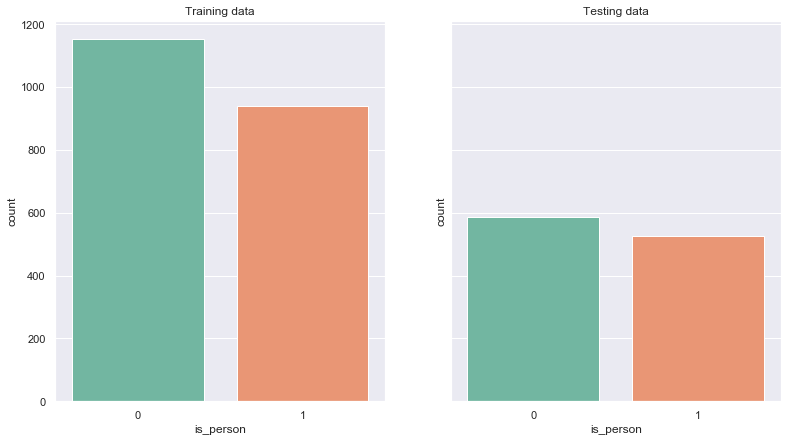

In [7]:
# create a subplots
fig, ax = plt.subplots(1, 2, figsize=(13,7),sharey=True)  

# plot the is_person classes
sns.countplot(y_train,palette="Set2",ax = ax[0])
sns.countplot(y_test, palette="Set2", ax =ax[1])

# --- titles and labels
ax[0].title.set_text('Training data')
ax[1].title.set_text('Testing data')
plt.show()

- As there is an almost even distrbution, it could be easy for a baseline classfier to achieve an accuracy of 50%.
- I feel like a classifcation accuracy might not be the best way of actually evaluating classfiers due to it only having two possible classess.
- A better accuracy measure could be precision as here we are looking at which photos actually have people in them and which one the classifier got correct
- I think this also depends upon the definition of actually having a person in a picture. Although this is supervised learning, there could be a problem with actually seeing if there is a person in a picture.

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

A simple baseline classifier would be using a most frequent model which means picking the most  frequent label in the training data. This would be more relevant as this is a binary classification problem which means either it contains a person or it does not.

In [8]:
# create, train and predict with a dummy classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)
dummy_acc = dummy.score(X_test,y_test)

print('The accuracy is %.4f' % dummy_acc)

The accuracy is 0.5265


### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

In [9]:
# create a regression model, fit and predict it 
clf = LogisticRegression(solver ='lbfgs')
clf.fit(X_train, y_train)
clf_acc = clf.score(X_test,y_test)

print('The accuracy is %.4f' % clf_acc)

The accuracy is 0.5265


- From the accuracy score, we can see that Logistic Regression gives the same accuracy as the baseline classifier. This is because it is just predicting 0s for all the photos.

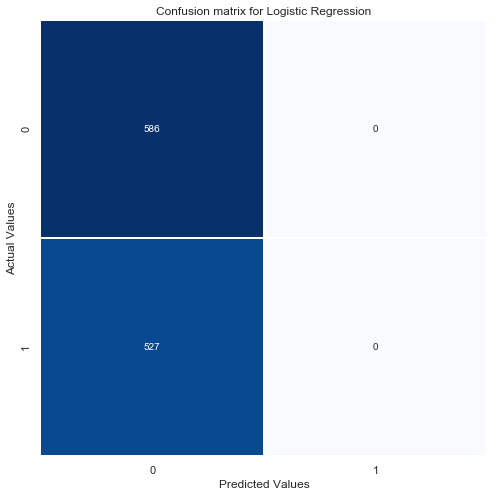

In [10]:
# creates a confusion matrix
cm = confusion_matrix(y_test,clf.predict(X_test))   

# make the plot a larger size
plt.figure(figsize = (8,8))

# create a confusion matrix
sns.heatmap(cm,annot=True,fmt="d", cmap = 'Blues', linewidths=.5, cbar=False)

# --- titles and labels
plt.title('Confusion matrix for Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

- This could be happening due to the features having a low variance as when the values of the features are so low (having a look at the maximum values for the features in training and testing data), This means that the features do not actually train the classifier, meaning that the regression acts like a baseline.

### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(c)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

- You would preprocess both the training and testing data. We would first preprocess the training data and the way you preprocess the training would be also the same way you preprocess the testing data. This would end up being a function you apply to the training data and then the testing data.
- The repercussions of this is that while it may be suited to the training data, it may not be suited to the testing data

In [11]:
from sklearn import preprocessing

# scale the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

The accuracy is 0.6792


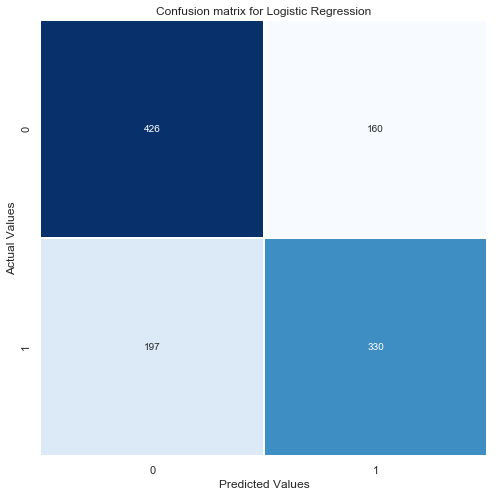

In [12]:
# train a classifier
clf_p = LogisticRegression(solver ='lbfgs')
clf_p.fit(X_train_minmax, y_train)
clf_acc_p = clf_p.score(X_test_minmax,y_test)

print('The accuracy is %.4f' % clf_acc_p)

# creates a confusion matrix
cm_p = confusion_matrix(y_test,clf_p.predict(X_test_minmax))   

# make the plot a larger size
plt.figure(figsize = (8,8))

# create a confusion matrix
sns.heatmap(cm_p,annot=True,fmt="d", cmap = 'Blues', linewidths=.5, cbar=False)

# --- titles and labels
plt.title('Confusion matrix for Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

- The new trained classifier has an accuracy of 67.92% while the old one 52.65%. This means that the newly trained classifier was better than the old classifier.

### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

We use cross validation to make sure it does not cause overfitting where the classifier works well for the training data but not well for the test data. This means that the classifier works well for data such as the training data which is very specific but not for the test data which may be more generalized.

In [13]:
# load the dataset
b_img = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'Images_B_Train.csv'))
b_test = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'Images_B_Test.csv'))

# get the data we need
b_img = pd.concat([b_img.iloc[:,0:500],b_img['is_person']],axis =1)
b_test = pd.concat([b_test.iloc[:,0:500],b_test['is_person']],axis =1)

# split the data sets
X_train_b = b_img.drop('is_person', axis=1)
X_test_b = b_test.drop('is_person', axis =1)
y_train_b = b_img['is_person']
y_test_b = b_test['is_person']

In [14]:
# cross validation
k_cross = KFold(n_splits=5, shuffle=True, random_state=0)

score =[]
c_range = np.geomspace(1e-5, 1e5,num=20)

# calculating which different c values using cross validation
for c in c_range:
    log_reg =LogisticRegression(solver ='lbfgs', C=c)
    score.append(cross_val_score(log_reg, 
                                 X_train_b, 
                                 y_train_b, 
                                 cv=k_cross))

'Best C value is 0.001274 with mean accuracy of 0.7014'

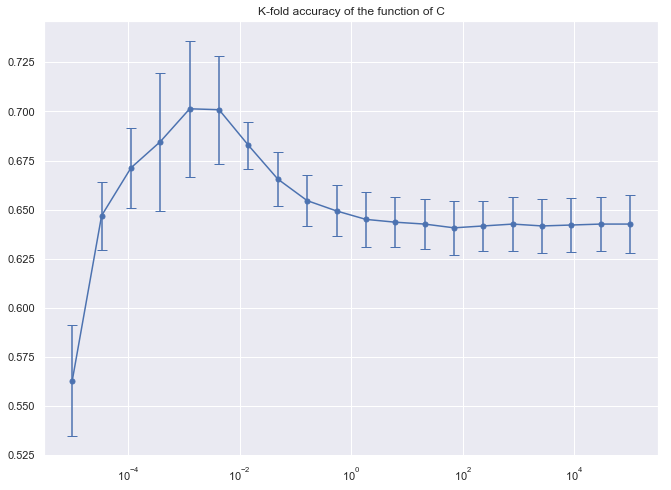

In [15]:
score = np.array(score)
mean_score = [a.mean() for a in score]
index =np.argmax(mean_score)
display('Best C value is %.6f with mean accuracy of %.4f' %(c_range[index],mean_score[index]))

# make the plot a larger size
plt.figure(figsize = (11,8))


std = score.std(axis=1)

plt.errorbar(c_range, mean_score,yerr=std,markersize=5,fmt='o-',capsize=5,color='b')

#---- Titles and scaling 
plt.title('K-fold accuracy of the function of C' )
plt.xscale('log')
plt.show()

- From the errorbar plot we can see that the C parameter changes the accuracy of the logistic regression
- As the C values increases, we can see the standard deviation decreasing overall and stabilising
- As the C values increases, we can see the mean also stabilising.
- This is because it starts to converge.

In [16]:
# train a new model
new_log_reg = LogisticRegression(solver='lbfgs',C=c_range[index])
new_log_reg.fit(X_train_b,y_train_b)
new_log_reg_acc = new_log_reg.score(X_test_b,y_test_b)

print('The accuracy of the new logisitic regression is %.4f' % new_log_reg_acc)

The accuracy of the new logisitic regression is 0.6981


### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


(a) ***Your answer goes here:***

In [17]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

In [18]:
# (d) # Your Code goes here:

### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotters` module), plot the decision boundary for all three classifiers.<br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

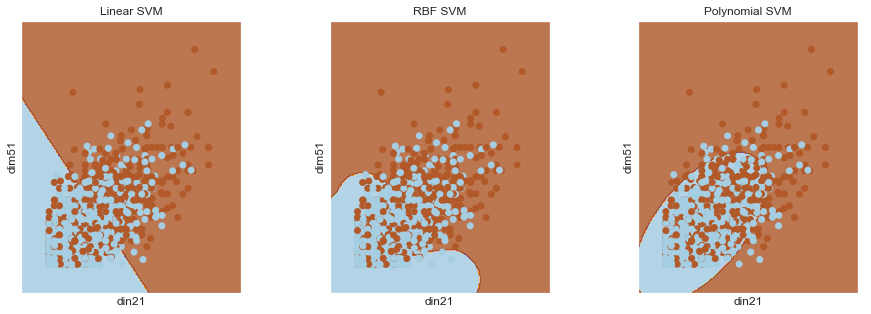

In [19]:
from sklearn.svm import SVC
from utils.plotter import plot_SVM_DecisionBoundary

X_train_svc = np.array(X_train_b[['dim21','dim51']])

# train SVMs and trains it
linear = SVC(kernel='linear')
rbf = SVC(kernel='rbf', gamma='auto')
polynomial = SVC(kernel='poly', degree=2)

linear.fit(X_train_svc,y_train_b)
rbf.fit(X_train_svc,y_train_b)
polynomial.fit(X_train_svc,y_train_b)

plot_SVM_DecisionBoundary([linear,rbf,polynomial],
                          X_train_svc,
                          y_train_b,
                          title=['Linear SVM','RBF SVM','Polynomial SVM'],
                          labels=['din21','dim51'])

- Linear SVM has a linear decision boundary
- Rbf SVM tries to make the decision boundary fit the data it is given.
- Polynoimal SVM tries to make the decision boundary more flexiable with the data

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the **FULL** dataset (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.5](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

In [39]:
scores =[]

c_values = np.geomspace(1e-2, 1e3,num=6)
degree_values = np.arange(1,6)
# calculating which different c values using cross validation
for c in c_values:
    second =[]
    for d in degree_values:
        poly_clf = SVC(C=c,degree=d, kernel='poly')
        mean_acc =cross_val_score(poly_clf, 
                                     X_train_b, 
                                     y_train_b, 
                                     cv=k_cross)
        second.append(mean_acc)
        print('C = {}, d = {} and mean accuracy is {:.4f}'.format(c, d,mean_acc.mean()))
    scores.append(second)

C = 0.01, d = 1 and mean accuracy is 0.5528
C = 0.01, d = 2 and mean accuracy is 0.5509
C = 0.01, d = 3 and mean accuracy is 0.5509
C = 0.01, d = 4 and mean accuracy is 0.5509
C = 0.01, d = 5 and mean accuracy is 0.5504
C = 0.1, d = 1 and mean accuracy is 0.6837
C = 0.1, d = 2 and mean accuracy is 0.5738
C = 0.1, d = 3 and mean accuracy is 0.5604
C = 0.1, d = 4 and mean accuracy is 0.5542
C = 0.1, d = 5 and mean accuracy is 0.5528
C = 1.0, d = 1 and mean accuracy is 0.6928
C = 1.0, d = 2 and mean accuracy is 0.6684
C = 1.0, d = 3 and mean accuracy is 0.6765
C = 1.0, d = 4 and mean accuracy is 0.6235
C = 1.0, d = 5 and mean accuracy is 0.6030
C = 10.0, d = 1 and mean accuracy is 0.6665
C = 10.0, d = 2 and mean accuracy is 0.6612
C = 10.0, d = 3 and mean accuracy is 0.6789
C = 10.0, d = 4 and mean accuracy is 0.6292
C = 10.0, d = 5 and mean accuracy is 0.5877
C = 100.0, d = 1 and mean accuracy is 0.6421
C = 100.0, d = 2 and mean accuracy is 0.6612
C = 100.0, d = 3 and mean accuracy is 0.

'Best combination is C value of 1.00 and degree 1.00 with mean accuracy of 0.6928'

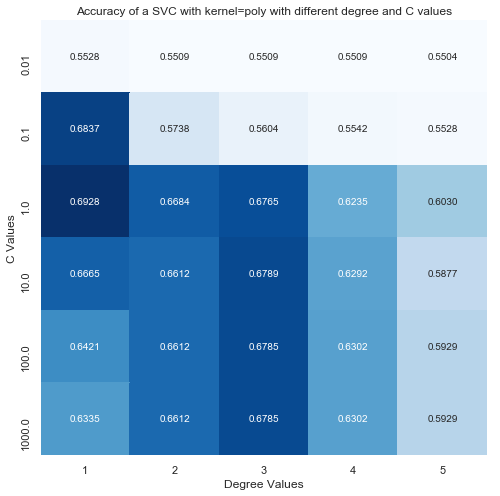

In [75]:
plt.figure(figsize = (8,8))

# finds out the best value
c_index = index_acc//5
d_index = index_acc %5
scores_array = np.array(scores).mean(axis=2)
index_acc = np.argmax(scores_array)
display('Best combination is C value of %.2f and degree %.2f with mean accuracy of %.4f'
        %(c_values[c_index], 
          degree_values[d_index], 
          scores_array[c_index][d_index]))

# plot the accuracy for C values and degree values 
sns.heatmap(scores_array,
            annot=True,
            fmt=".4f", 
            cmap = 'Blues', 
            cbar=False,
            xticklabels=degree_values,
           yticklabels=c_values)

#-----Titles and labels
plt.xlabel('Degree Values')
plt.ylabel('C Values')
plt.title('Accuracy of a SVC with kernel=poly with different degree and C values')
plt.show()

In [76]:
c_best = c_values[c_index]
d_best = degree_values[d_index]

# train a new SVM
new_poly_kernel = SVC(C=c_best,degree=d_best,kernel='poly')
new_poly_kernel.fit(X_train_b,y_train_b)
new_poly_kernel_acc = new_poly_kernel.score(X_test_b,y_test_b)

print('The accuracy is %.4f' % new_poly_kernel_acc)

The accuracy is 0.6891


- The logistic regression compared to the the SVC is almost the same with the logistic regression be slighly higher as it has an accuracy of 69.81% while the SVC has an accuracy of 68.91%
- The C-values used in each classifier are also very different and are quite on the extremes of the range(0,1) as the SVC used 1 while the logisitic regression used 0.001274
- Both the SVC and the logisitc regression are linear

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

(a) ***Your answer goes here:***

(b) ***Your answer goes here:***

(c) ***Your answer goes here:***

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)